In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Introduction

In [2]:
# import snaptocmap as sn
from functions import convert_to_cmap
from classes import CMap

`snaptocmap` reads files into a native `CMap` object. This handles the parsing and extraction of colors into colormaps.

In [3]:
fname = 'vangogh.jpg'

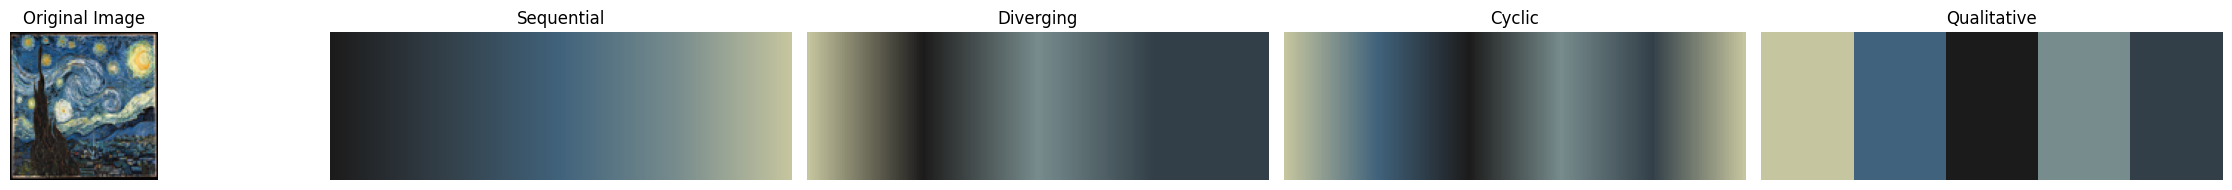

In [4]:
# display all colormaps available
vangogh_obj = CMap(f'images/{fname}')
vangogh_obj.display_all_cmaps()

For a one-line conversion of an image to a colormap, the `convert_to_cmap` function can be used

In [5]:
# one-liner for conversion of image to cmap
vangogh = convert_to_cmap(f'images/{fname}')

## Examples plots

### matplotlib

In [6]:
vangogh_mpl = convert_to_cmap(f'images/{fname}', library='matplotlib')

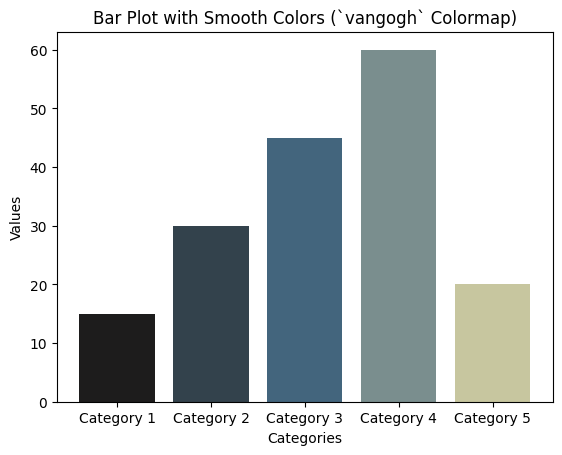

In [7]:
# example bar plot
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [15, 30, 45, 60, 20]

colors = vangogh_mpl(np.linspace(0, 1, len(categories)))
plt.bar(categories, values, color=colors)
plt.title(f'Bar Plot with Smooth Colors (`vangogh` Colormap)')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

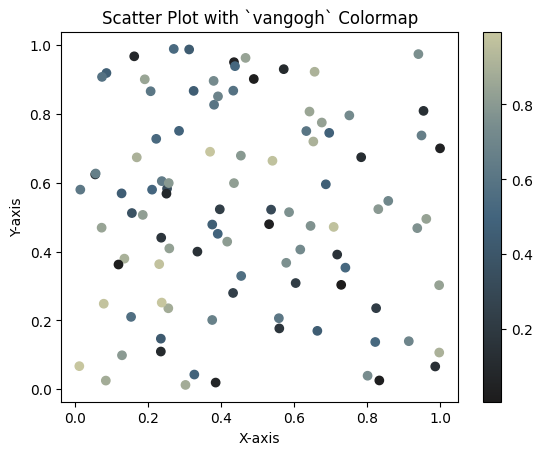

In [8]:
# example scatter plot
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)  # Defining colors based on data range
plt.scatter(x, y, c=colors, cmap=vangogh_mpl)
plt.colorbar()
plt.title('Scatter Plot with `vangogh` Colormap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### seaborn

In [9]:
vangogh_sns = convert_to_cmap(f'images/{fname}', library='seaborn')

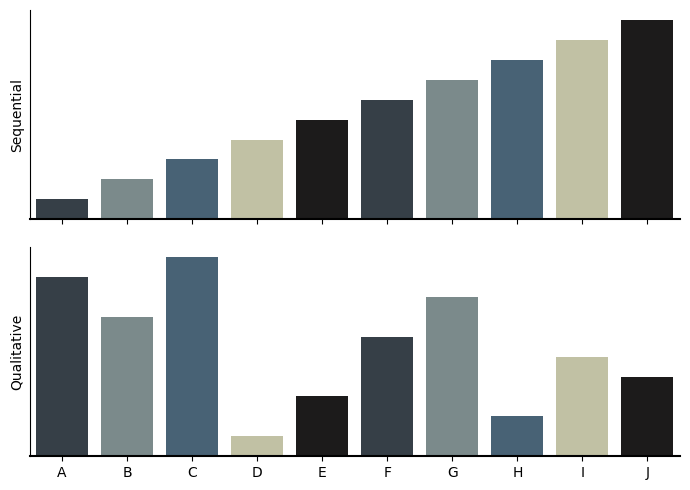

In [10]:
# example bar plot - https://seaborn.pydata.org/examples/palette_choices.html
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

rs = np.random.RandomState(8)
# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, hue=x, palette=vangogh_sns, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Randomly reorder the data to make it qualitative
y2 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y2, hue=x, palette=vangogh_sns, ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


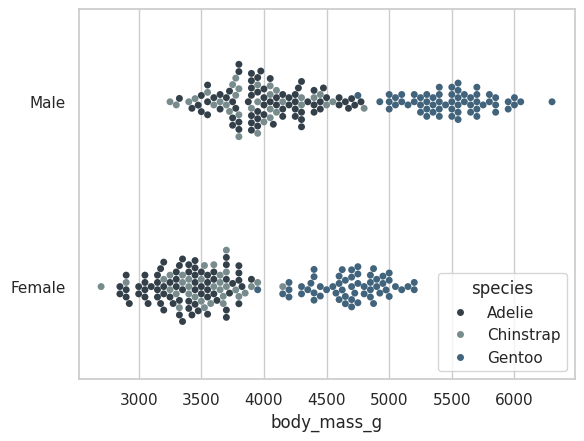

In [11]:
# example scatterplot - https://seaborn.pydata.org/examples/scatterplot_categorical.html

sns.set_theme(style="whitegrid", palette=vangogh_sns)
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")
plt.show()


### Plotly (#TODO)

In [12]:
vangogh_px = convert_to_cmap(f'images/{fname}', library='plotly')

In [23]:
df = px.data.iris()
df["e"] = df["sepal_width"]/100
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", color_discrete_sequence=vangogh_px)
fig.show()

In [17]:
import pandas as pd
df = px.data.medals_long()
# add some example data to increase color palettet
df2 = pd.DataFrame([['Antarctica', 'gold', 10]], columns=['nation','medal','count'])
df3 = pd.DataFrame([['Atlantis', 'bronze', 4]], columns=['nation','medal','count'])

df = pd.concat([df, df2, df3])

fig = px.bar(df, x="medal", y="count", color="nation", color_discrete_sequence=vangogh_px)
fig.show()


## (TODO)
1. Validate that cmaps work plotly (WIP)
2. Incorporate test suite
3. Package with pre-existing common cmaps
4. Generate example plot with different colormap displays

## Ideas

1. Wrapper library for colormap importing that allows for one-line conversions of images into colormap objects
2. Colormap objects can plug-in to the big python data visualization libraries (matplotlib, seaborn, plotly)
3. Colormap objects can allow for customization of imported colormap into converging/diverging/chromatic/etc colormaps
4. Library comes prepackaged with some colormaps that are particularly beautiful to author/famous enough